<a href="https://colab.research.google.com/github/leannmlindsey/gLM_tokenization/blob/main/TokenizationFINALFigures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn3
import numpy as np

# Accuracy Trends by Category


In [2]:
#df = pd.read_csv('benchmark_raw.csv')
#df = pd.read_csv('benchmark_results_raw.csv')
#df = pd.read_csv('benchmark_acc_raw.csv')
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_acc_raw.csv')

df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Benchmark      51 non-null     object 
 1   Category       51 non-null     object 
 2   Dataset        51 non-null     object 
 3   CNN            51 non-null     float64
 4   GPT-2          51 non-null     float64
 5   NT-kmer        51 non-null     float64
 6   DNABERT1-kmer  51 non-null     float64
 7   DNABERT2-bpe   51 non-null     float64
 8   HyenaDNA-char  51 non-null     float64
 9   Mamba-char     51 non-null     float64
 10  Mamba-bpe      51 non-null     float64
 11  Caduceus-char  51 non-null     float64
dtypes: float64(9), object(3)
memory usage: 4.9+ KB


In [4]:
df.head()

,Benchmark,Category,Dataset,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char
0,Genomic Benchmark,coding,demo_coding_vs_intergenomic_seqs,0.892,0.771,0.909,0.866,0.896,0.899,0.913,0.886,0.914
1,Genomic Benchmark,enhancers,dummy_mouse_enhancers_ensembl,0.715,0.649,0.676,0.621,0.654,0.641,0.768,0.758,0.802
2,Genomic Benchmark,enhancers,human_enhancers_cohn,0.705,0.609,0.714,0.652,0.650,0.671,0.736,0.730,0.747
3,Genomic Benchmark,enhancers,human_enhancers_ensembl,0.767,0.676,0.855,0.804,0.831,0.893,0.864,0.864,0.889
4,Genomic Benchmark,promoters,human_nontata_promoters,0.860,0.706,0.863,0.780,0.818,0.914,0.920,0.914,0.947


In [5]:
df_long_acc = pd.melt(df, id_vars=['Benchmark','Dataset', 'Category'], var_name='Model', value_name='Score')

In [6]:
df_long_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  459 non-null    object 
 1   Dataset    459 non-null    object 
 2   Category   459 non-null    object 
 3   Model      459 non-null    object 
 4   Score      459 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.1+ KB


In [7]:
df_long_acc['Score'] = pd.to_numeric(df_long_acc['Score'], errors='coerce')
df_long_acc['Score'].fillna(value=0, inplace=True)
df_long_acc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  459 non-null    object 
 1   Dataset    459 non-null    object 
 2   Category   459 non-null    object 
 3   Model      459 non-null    object 
 4   Score      459 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.1+ KB


In [8]:
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['promoters', 'enhancers', 'regulatory'])]

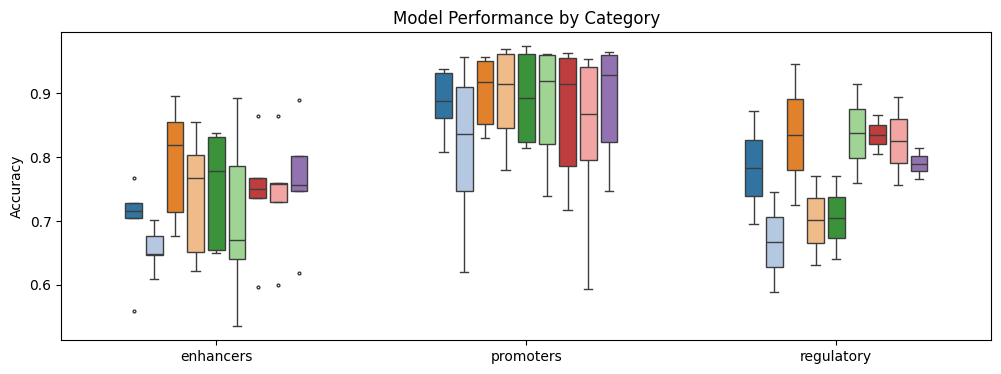

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)

plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()

plt.savefig('box_plot_comparison_regulatory.jpg', format='jpg')
plt.show()


In [10]:
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['emp', 'transcription factors', 'splice sites'])]

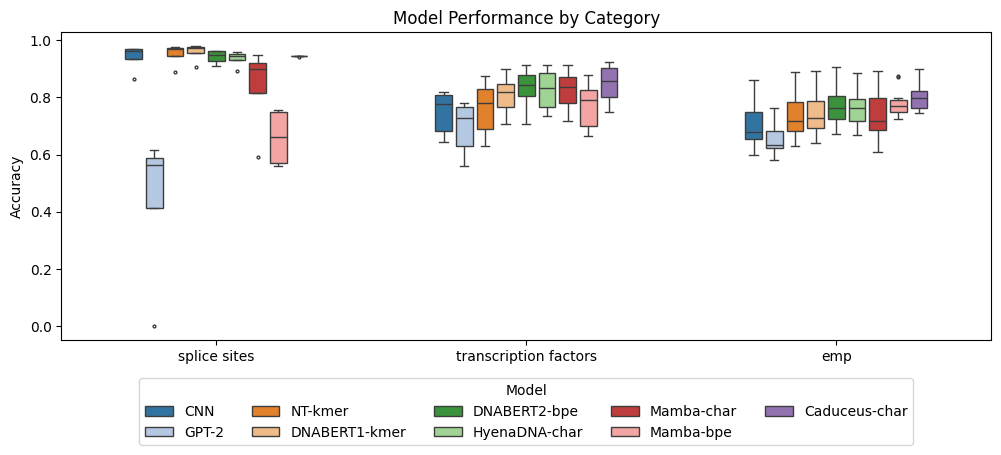

In [11]:
# Create the box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)

# Adjust the legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)

plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.savefig('box_plot_comparison_transcription.jpg', format='jpg')
plt.show()

<Figure size 1200x800 with 0 Axes>

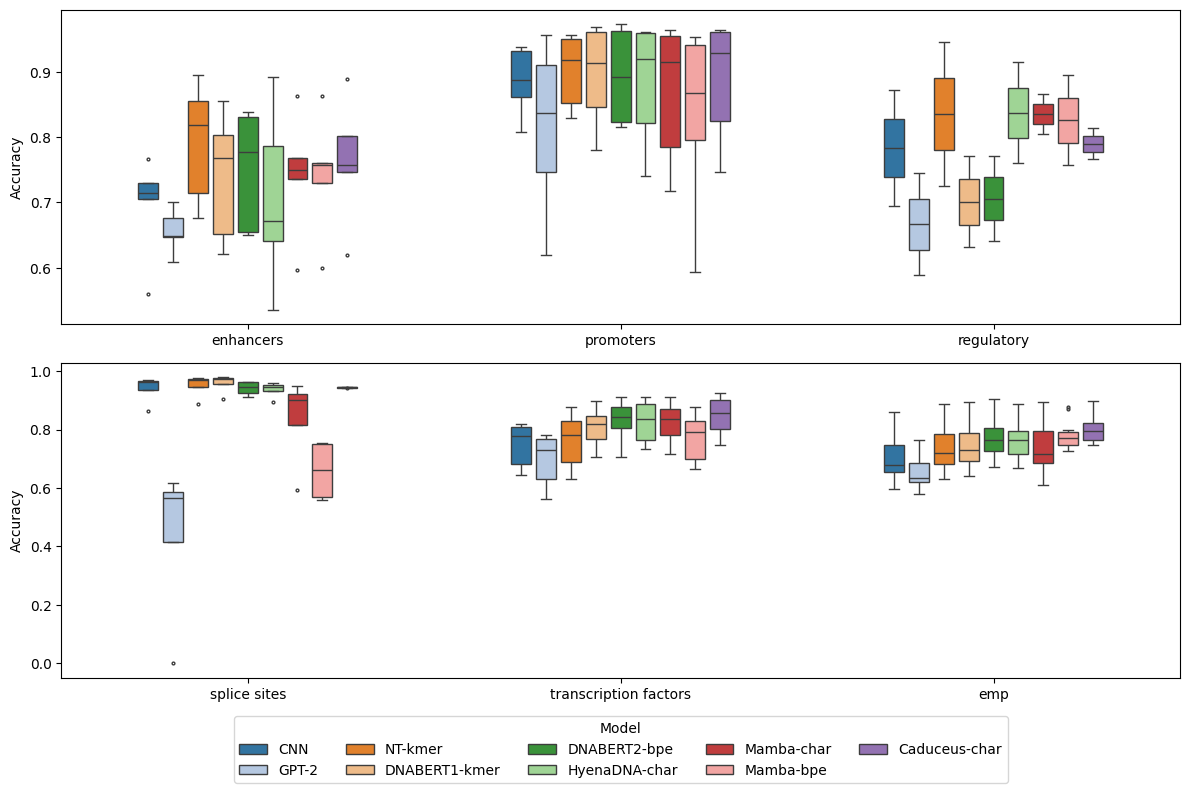

In [12]:
plt.figure(figsize=(12, 8))
# Plot 1
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['promoters', 'enhancers', 'regulatory'])]
plt.figure(figsize=(12, 8))  # Adjust figsize to accommodate both subplots
plt.subplot(2, 1, 1)  # Subplot 1 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()  # Remove legend for the first plot


# Plot 2
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['emp', 'transcription factors', 'splice sites'])]
plt.subplot(2, 1, 2)  # Subplot 2 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save both plots with shared legend
plt.savefig('box_plots_combined_acc.jpg', format='jpg')

plt.show()

# MCC Trends by Category

In [13]:
#df = pd.read_csv('benchmark_mcc_raw.csv')
df = pd.read_csv("https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv")
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Benchmark      52 non-null     object 
 1   Category       52 non-null     object 
 2   Dataset        52 non-null     object 
 3   CNN            52 non-null     float64
 4   GPT-2          52 non-null     float64
 5   NT-kmer        52 non-null     float64
 6   DNABERT1-kmer  52 non-null     float64
 7   DNABERT2-bpe   52 non-null     float64
 8   HyenaDNA-char  52 non-null     float64
 9   Mamba-char     52 non-null     float64
 10  Mamba-bpe      52 non-null     float64
 11  Caduceus-char  52 non-null     float64
dtypes: float64(9), object(3)
memory usage: 5.0+ KB


In [15]:
df.head()

,Benchmark,Category,Dataset,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char
0,Genomic Benchmark,enhancers,dummy_mouse_enhancers_ensembl,0.715,0.391,0.369,0.347,0.347,0.641,0.768,0.758,0.781
1,Genomic Benchmark,coding,demo_coding_vs_intergenomic_seqs,0.892,0.541,0.818,0.732,0.792,0.899,0.913,0.886,0.827
2,Genomic Benchmark,species,demo_human_or_worm,0.942,0.595,0.891,0.816,0.853,0.958,0.968,0.957,0.963
3,Genomic Benchmark,enhancers,human_enhancers_cohn,0.705,0.220,0.430,0.305,0.306,0.671,0.736,0.730,0.743
4,Genomic Benchmark,enhancers,human_enhancers_ensembl,0.767,0.499,0.710,0.609,0.662,0.893,0.864,0.864,0.892


In [16]:
df_long_mcc = pd.melt(df, id_vars=['Benchmark','Dataset', 'Category'], var_name='Model', value_name='Score')

In [17]:
df_long_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  468 non-null    object 
 1   Dataset    468 non-null    object 
 2   Category   468 non-null    object 
 3   Model      468 non-null    object 
 4   Score      468 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.4+ KB


In [18]:
df_long_mcc.head()

,Benchmark,Dataset,Category,Model,Score
0,Genomic Benchmark,dummy_mouse_enhancers_ensembl,enhancers,CNN,0.715
1,Genomic Benchmark,demo_coding_vs_intergenomic_seqs,coding,CNN,0.892
2,Genomic Benchmark,demo_human_or_worm,species,CNN,0.942
3,Genomic Benchmark,human_enhancers_cohn,enhancers,CNN,0.705
4,Genomic Benchmark,human_enhancers_ensembl,enhancers,CNN,0.767


In [19]:
df_long_mcc['Score'] = pd.to_numeric(df_long_mcc['Score'], errors='coerce')
df_long_mcc['Score'].fillna(value=0, inplace=True)
df_long_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  468 non-null    object 
 1   Dataset    468 non-null    object 
 2   Category   468 non-null    object 
 3   Model      468 non-null    object 
 4   Score      468 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.4+ KB


<Figure size 1200x800 with 0 Axes>

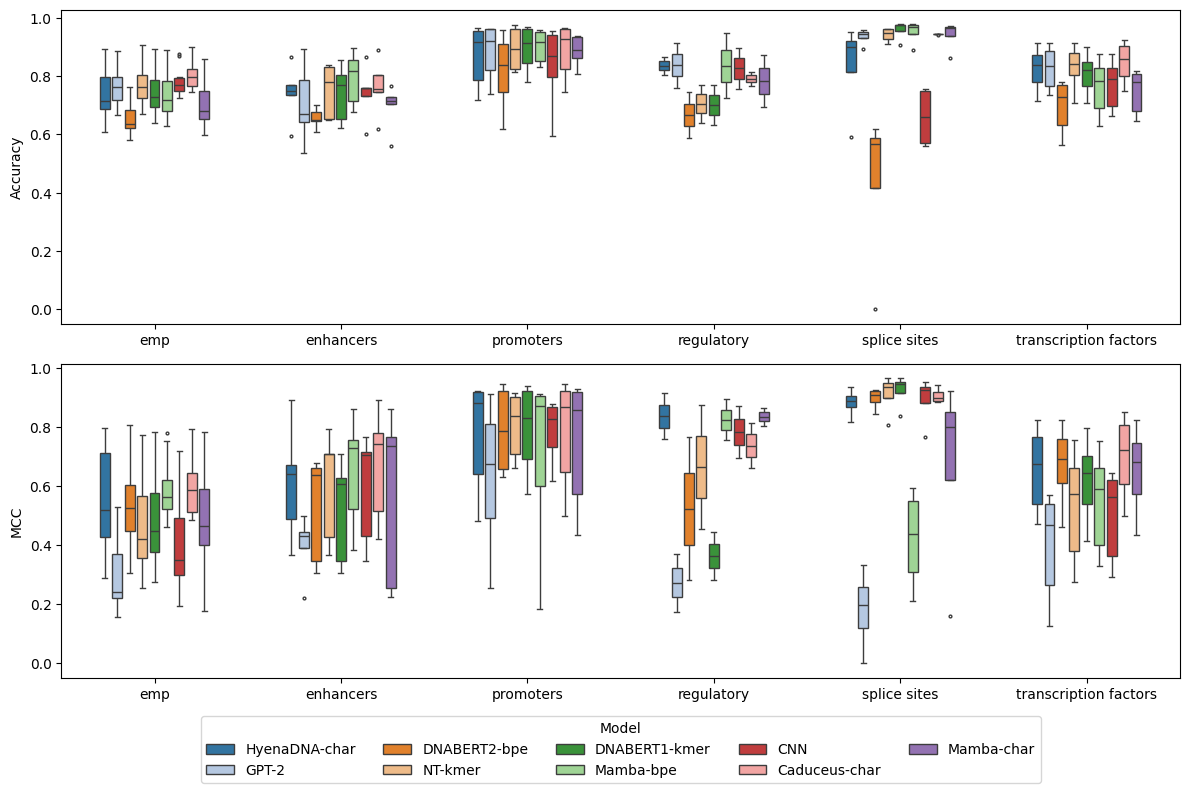

In [20]:
plt.figure(figsize=(12, 8))
category_order = ['promoters', 'enhancers', 'regulatory', 'emp', 'transcription factors', 'splice sites']
# Plot 1
df_long_acc = df_long_acc.sort_values(by='Category')
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(category_order)]
plt.figure(figsize=(12, 8))  # Adjust figsize to accommodate both subplots
plt.subplot(2, 1, 1)  # Subplot 1 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()  # Remove legend for the first plot


# Plot 2
df_long_mcc = df_long_mcc.sort_values(by='Category')
df_filtered_mcc = df_long_mcc[df_long_mcc['Category'].isin(category_order)]
plt.subplot(2, 1, 2)  # Subplot 2 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_mcc, width=0.6, fliersize=2, gap=.2)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
#plt.title('Model Performance by Category')
plt.ylabel('MCC')
plt.xlabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save both plots with shared legend
plt.savefig('box_plots_combined_mcc_acc.eps', format='eps')

plt.show()

# Heatmap MCC

In [21]:
#df = pd.read_csv('benchmark_mcc_raw.csv')
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [22]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])
#df_numeric

In [23]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

In [24]:
def heatmap(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='RdPu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

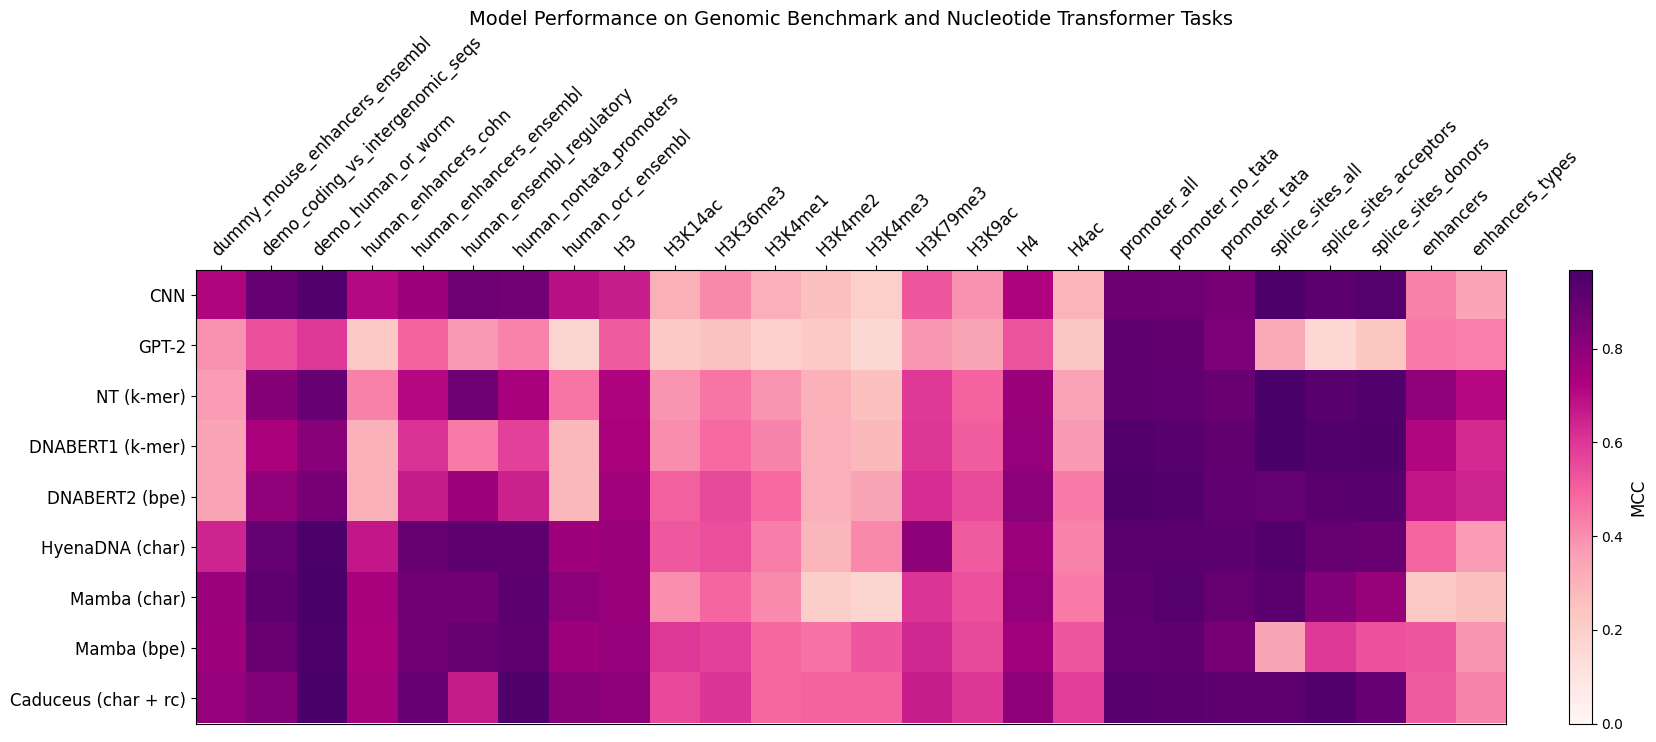

In [25]:
heatmap(df_numeric, 'Model Performance on Genomic Benchmark and Nucleotide Transformer Tasks', 'model_mcc_heatmap_gb_nt.pdf', 18, 7)

In [26]:
df_numeric = df[df['Benchmark'].isin(['GUE'])]
#df_numeric

In [27]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])
#df_numeric

In [28]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

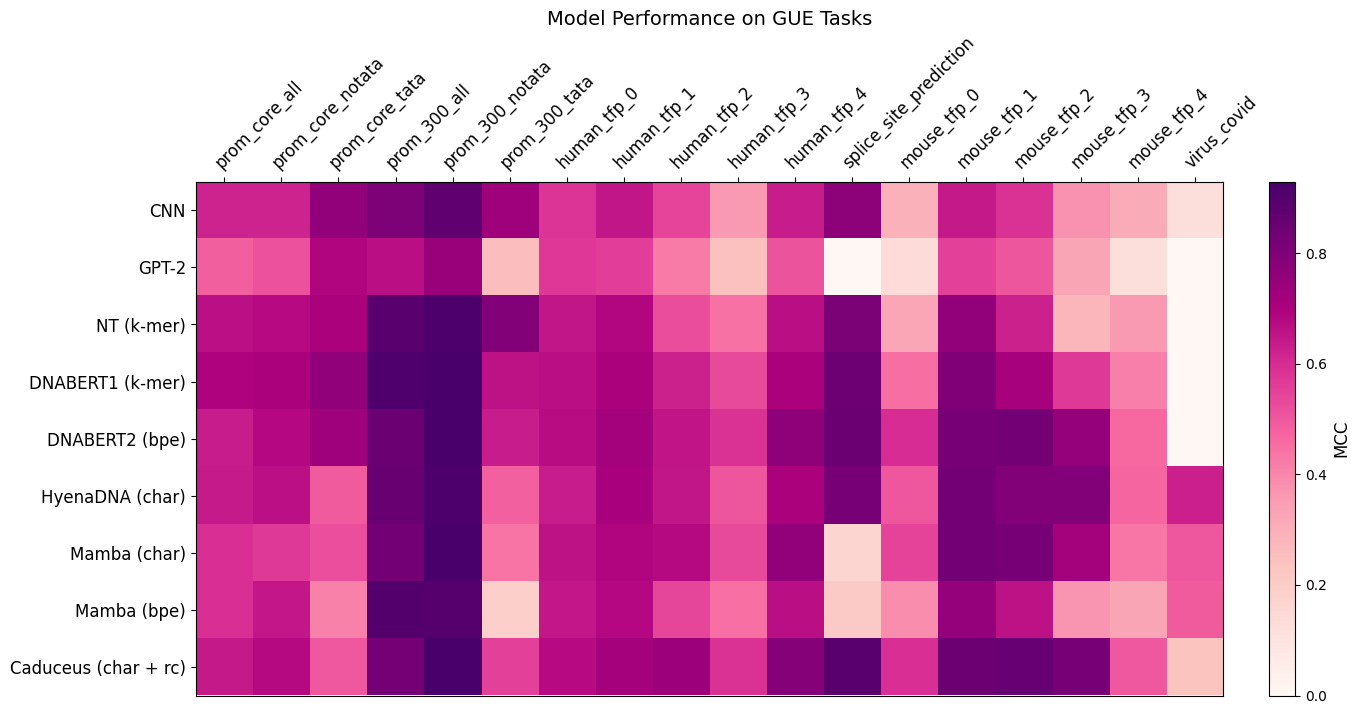

In [29]:
heatmap(df_numeric, 'Model Performance on GUE Tasks', 'model_mcc_heatmap_GUE.pdf', 14,7)

# Heatmap Accuracy

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_acc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [31]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])

In [32]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

In [33]:
def heatmap_acc(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='RdPu',vmin=0.5)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
  cbar.set_label('ACC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

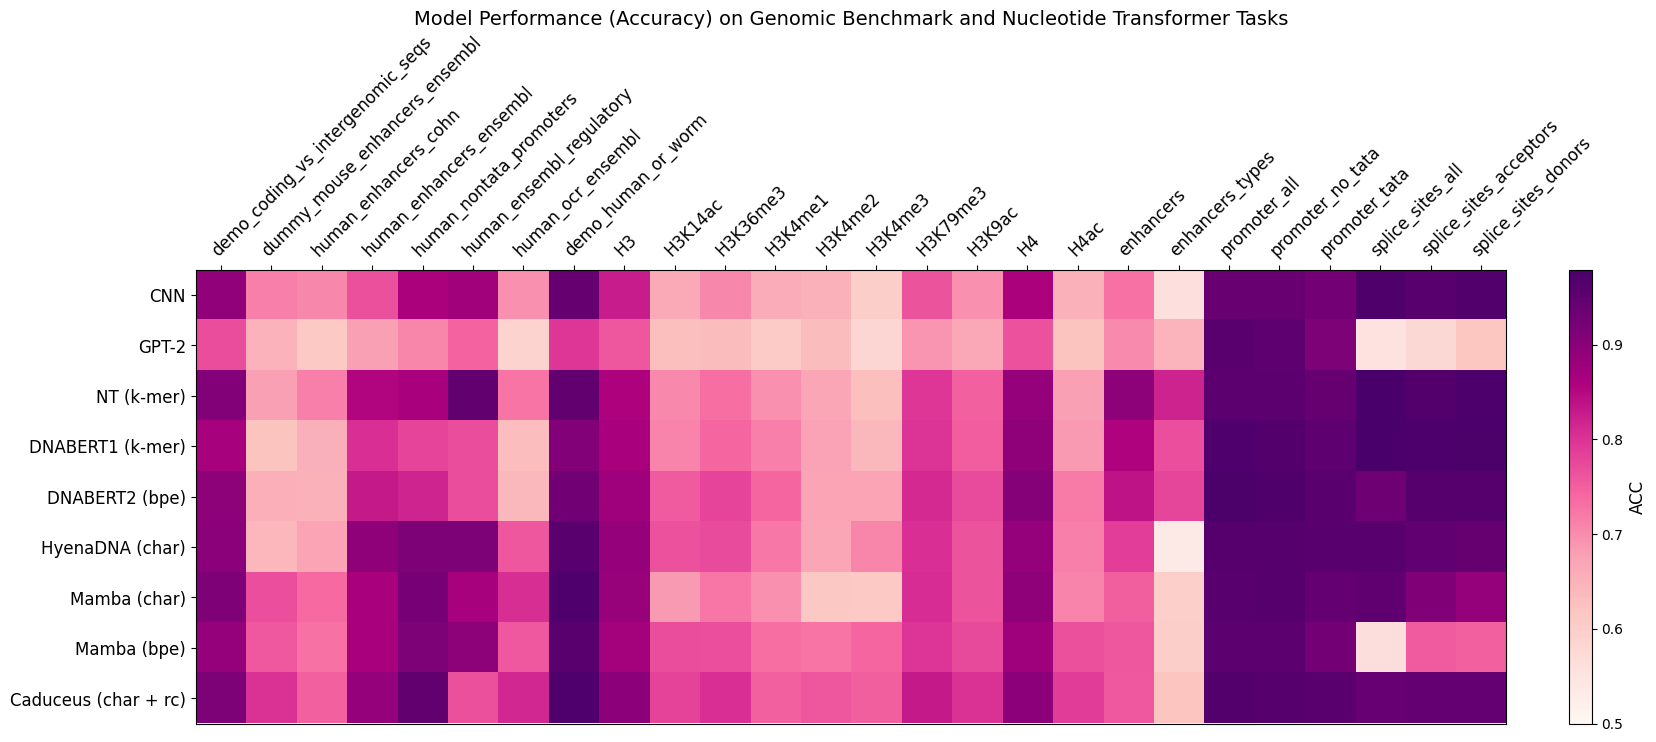

In [34]:
heatmap_acc(df_numeric, 'Model Performance (Accuracy) on Genomic Benchmark and Nucleotide Transformer Tasks', 'model_acc_heatmap_gb_nt.pdf', 18, 7)

In [35]:
df_numeric = df[df['Benchmark'].isin(['GUE'])]
#df_numeric

In [36]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])
#df_numeric

In [37]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

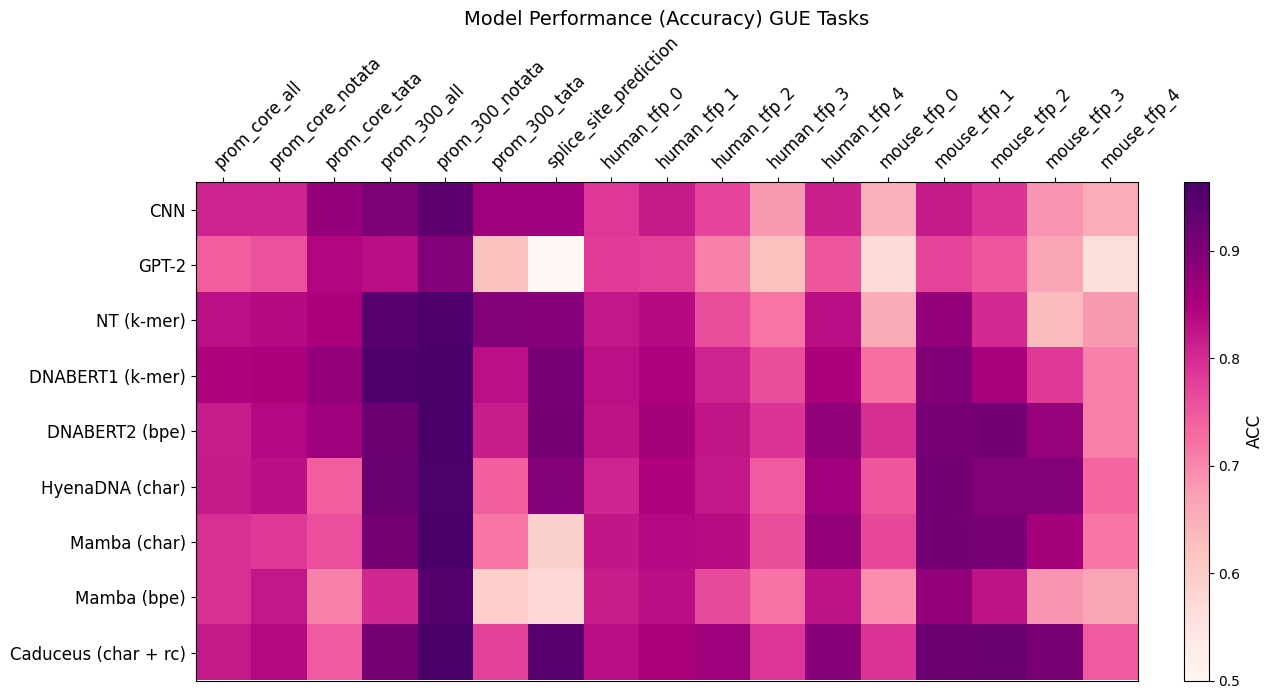

In [38]:
heatmap_acc(df_numeric, 'Model Performance (Accuracy) GUE Tasks', 'model_acc_heatmap_GUE.pdf', 14,7)

# Heatmap Vertical

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks', 'GUE'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [40]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])
#df_numeric

In [41]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
#df_numeric = df_numeric.transpose()

In [42]:
def heatmap_mcc_vertical(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='RdPu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal', fraction=0.046, pad=0.01)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(models)), labels=models)
  ax.set_yticks(np.arange(len(datasets)), labels=datasets, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  #ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

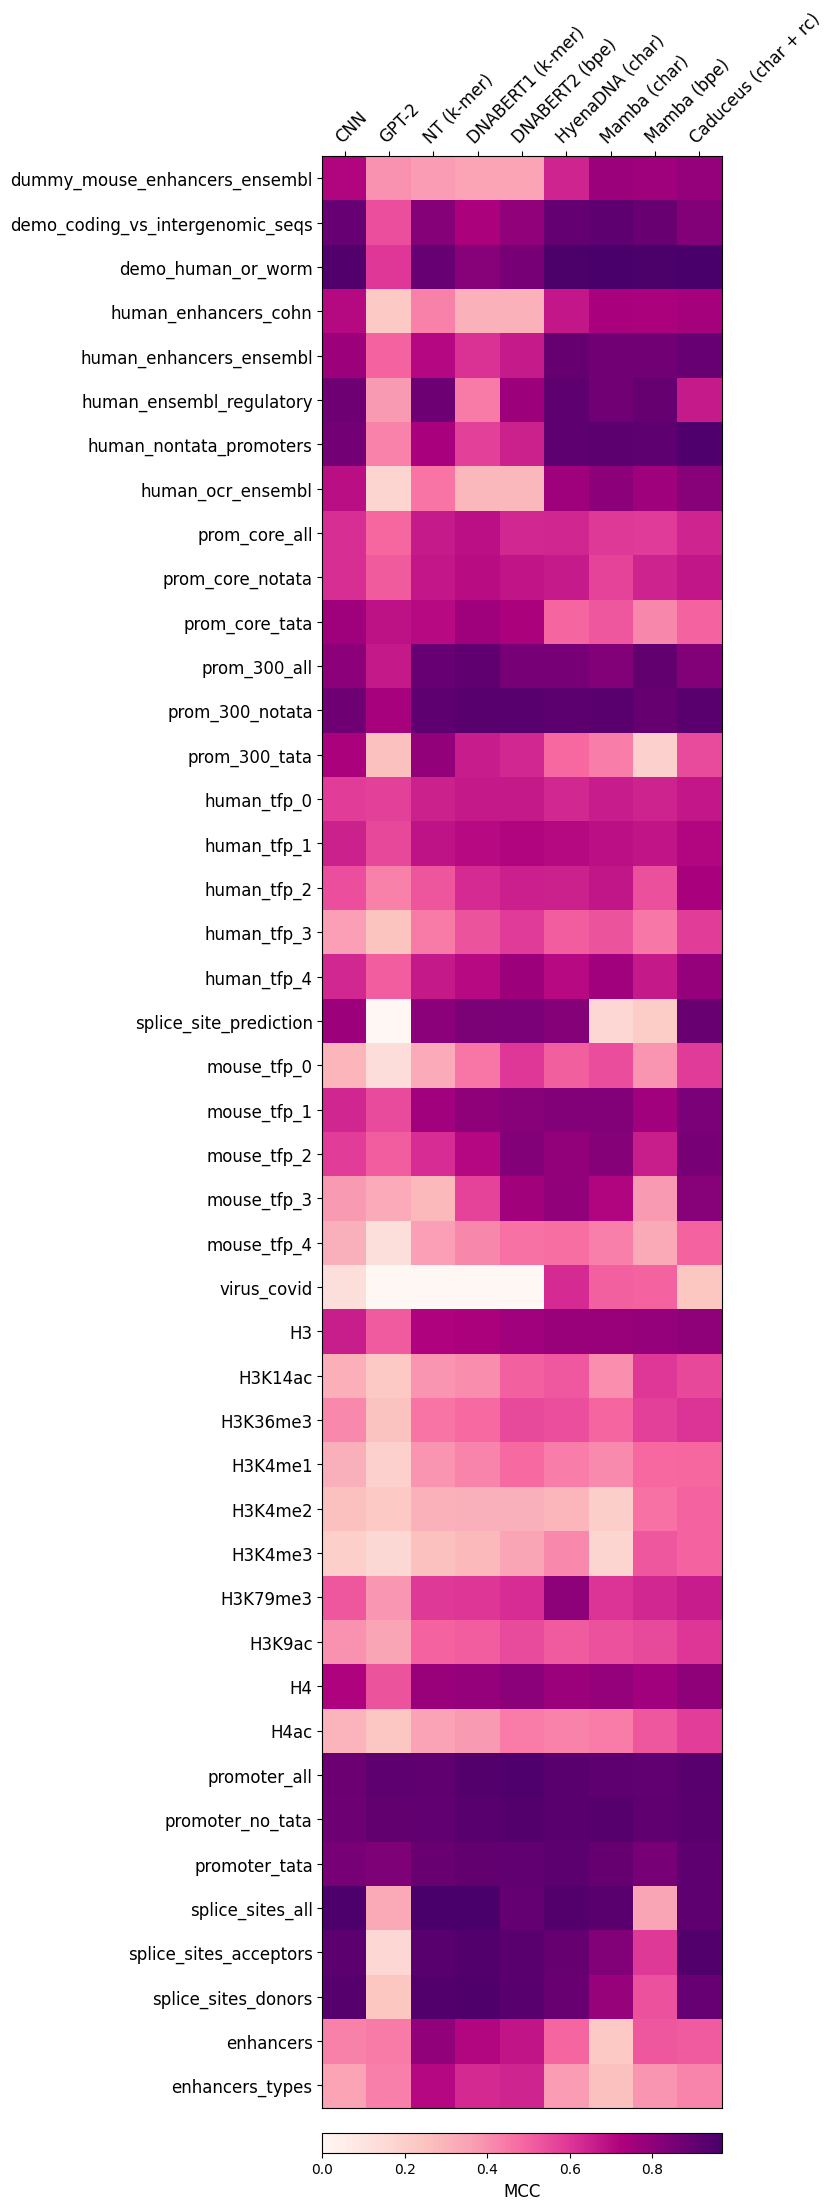

In [43]:
heatmap_mcc_vertical(df_numeric, 'Model Performance on All Benchmark Tasks', 'model_mcc_heatmap_all_vertical.pdf', 7, 27)

# Instability Trends - varying learning rate and batch size on genomic benchmark tasks


In [44]:
df_instability = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/instability_heatmap_gb.csv',index_col=0)
df_instability

,2e-3/128,2e-3/256,1e-3/64,1e-3/128,1e-3/256,1e-3/512,1e-4/64,1e-4/ 128,1e-4/256,1e-4/512,1e-5/64,1e-5/128,1e-5/256,1e-5/512,1e-6/64,1e-6/128,1e-6/256,1e-6/512
drosphilia,4,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ocr,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dummy_mouse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
demo_coding_vs_intergenic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
demo_human_vs_worm,4,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
human_enhancers_cohn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
human_enhancers_ensembl,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
human_ensemble_regulatory,5,3,2,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0
human_nontata_promoters,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df_instability_percent = df_instability.apply(lambda x: (x/10) * 100, axis=1)

In [46]:
df_instability_percent

,2e-3/128,2e-3/256,1e-3/64,1e-3/128,1e-3/256,1e-3/512,1e-4/64,1e-4/ 128,1e-4/256,1e-4/512,1e-5/64,1e-5/128,1e-5/256,1e-5/512,1e-6/64,1e-6/128,1e-6/256,1e-6/512
drosphilia,40.0,30.0,40.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ocr,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dummy_mouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
demo_coding_vs_intergenic,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
demo_human_vs_worm,40.0,50.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_enhancers_cohn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_enhancers_ensembl,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_ensemble_regulatory,50.0,30.0,20.0,60.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human_nontata_promoters,10.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


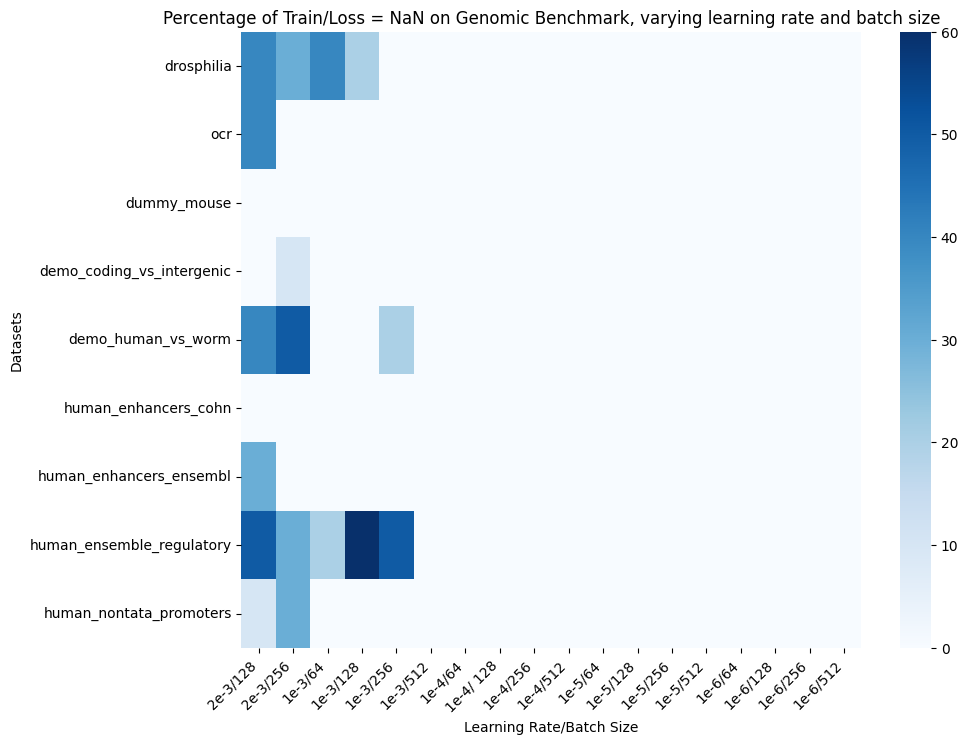

In [47]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_instability_percent, cmap="Blues")

# Customize the heatmap
plt.title('Percentage of Train/Loss = NaN on Genomic Benchmark, varying learning rate and batch size')
plt.xlabel('Learning Rate/Batch Size')
plt.ylabel('Datasets')

plt.xticks(rotation=45, ha='right')
plt.savefig('instability_heatmap_plot.pdf', format='pdf')

plt.show()

# Vocabulary Venn Diagrams


In [48]:
dnabert2_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/dnabert2_words.txt', header=None, names=['DNABERT2'])
dnabert2_list = dnabert2_words['DNABERT2'].tolist()

In [49]:
hg38_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/hg38_words.txt', header=None, names=['Hg38'])
hg38_list = hg38_words['Hg38'].tolist()

In [50]:
mouse_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/mouse_words.txt', header=None, names=['Mouse'])
mouse_list = mouse_words['Mouse'].tolist()

In [51]:
yeast_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/yeast_words.txt', header=None, names=['Yeast'])
yeast_list = yeast_words['Yeast'].tolist()

In [52]:
bacteria_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bacteria_words.txt', header=None, names=['Bacteria'])
bacteria_list = bacteria_words['Bacteria'].tolist()

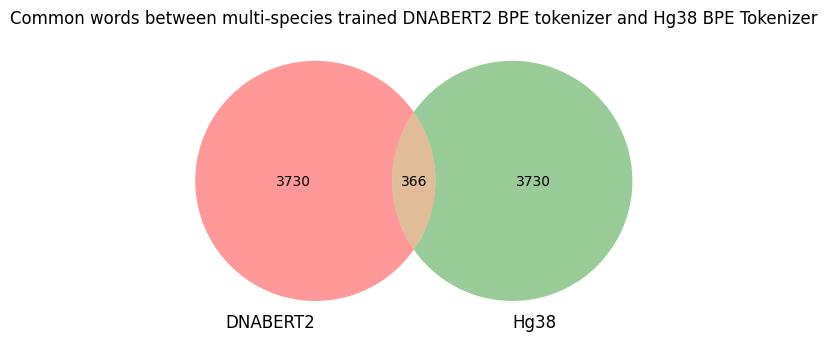

In [53]:
dnabert2 = set(dnabert2_list)
hg38 = set(hg38_list)
mouse = set(mouse_list)
yeast = set(yeast_list)
bacteria = set(bacteria_list)

# Create a Venn diagram
venn2([dnabert2, hg38], ('DNABERT2', 'Hg38'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Hg38 BPE Tokenizer")
plt.show()

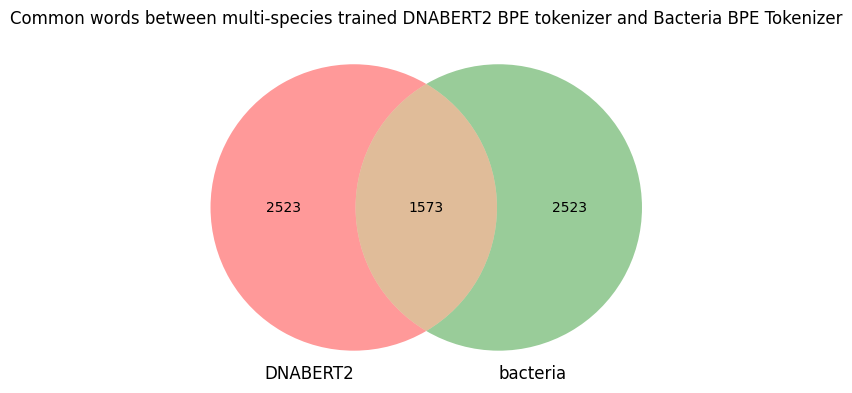

In [54]:
# Create a Venn diagram
venn2([dnabert2, bacteria], ('DNABERT2', 'bacteria'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Bacteria BPE Tokenizer")
plt.show()

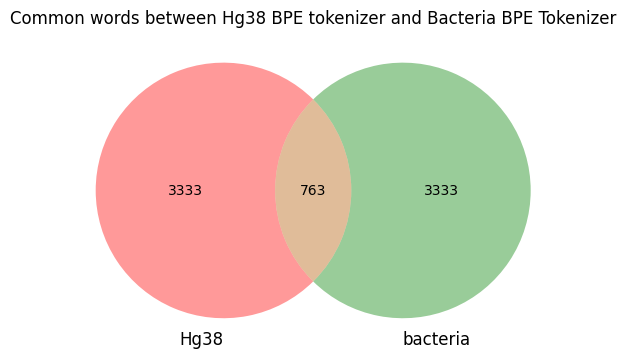

In [55]:
# Create a Venn diagram
venn2([hg38, bacteria], ('Hg38', 'bacteria'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Bacteria BPE Tokenizer")
plt.show()

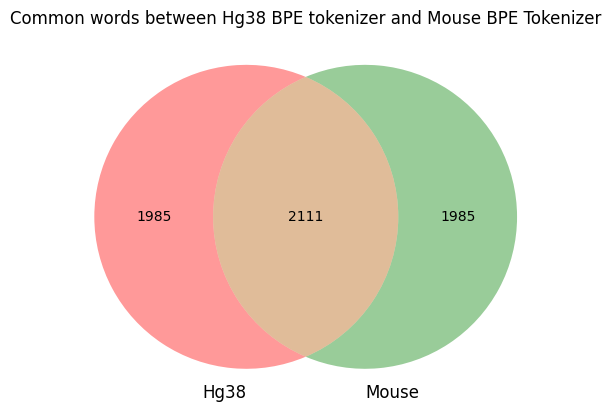

In [56]:
# Create a Venn diagram
venn2([hg38, mouse], ('Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Mouse BPE Tokenizer")
plt.show()

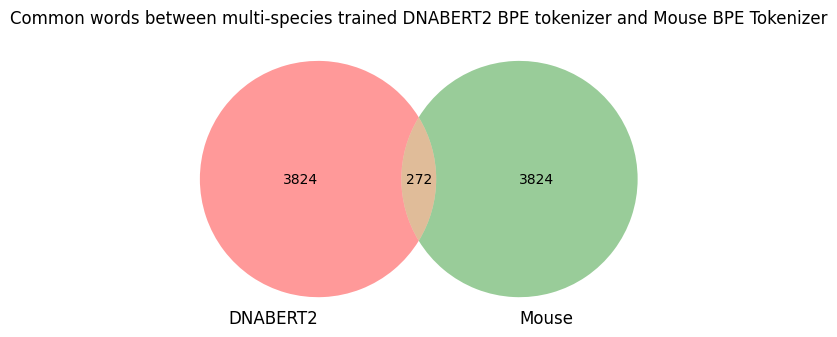

In [57]:
# Create a Venn diagram
venn2([dnabert2, mouse], ('DNABERT2', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Mouse BPE Tokenizer")
plt.show()

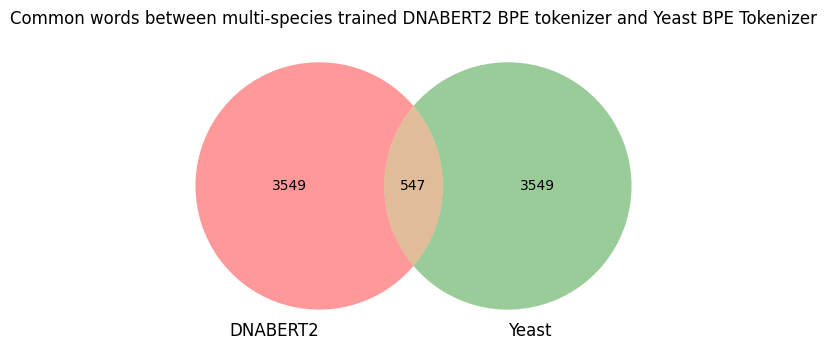

In [58]:
# Create a Venn diagram
venn2([dnabert2, yeast], ('DNABERT2', 'Yeast'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

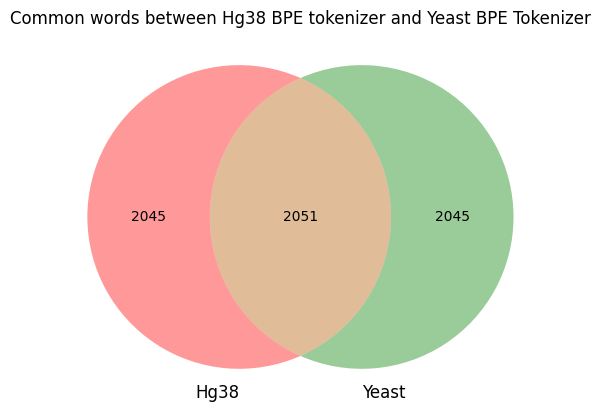

In [59]:
# Create a Venn diagram
venn2([hg38, yeast], ('Hg38', 'Yeast'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

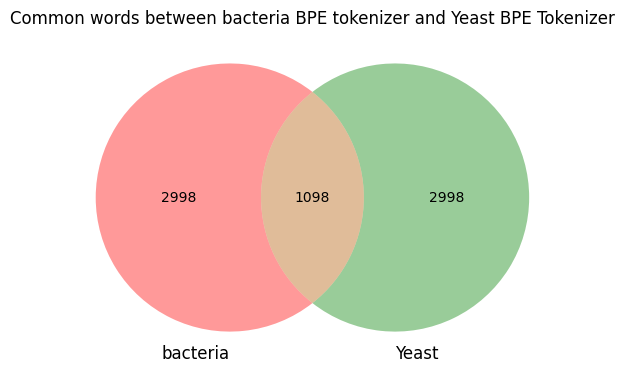

In [60]:
# Create a Venn diagram
venn2([bacteria, yeast], ('bacteria', 'Yeast'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

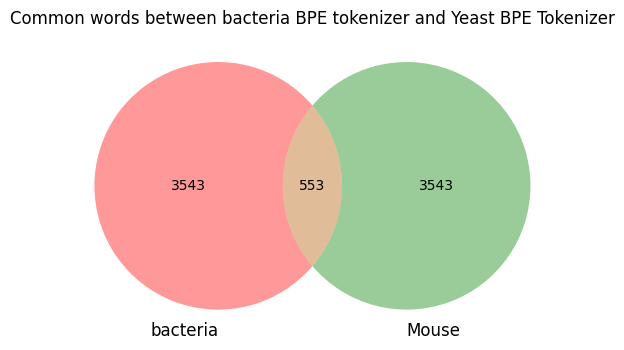

In [61]:
# Create a Venn diagram
venn2([bacteria, mouse], ('bacteria', 'Mouse'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

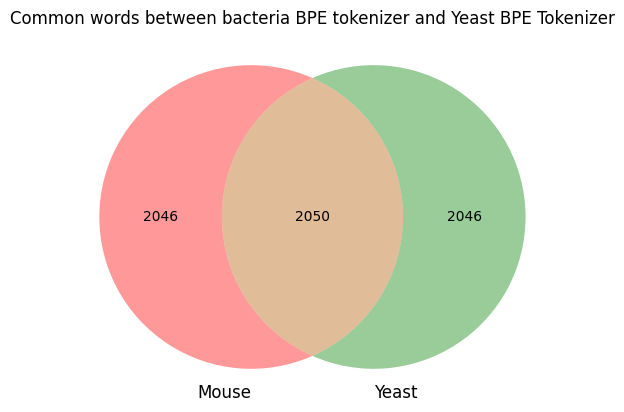

In [62]:
# Create a Venn diagram
venn2([mouse, yeast], ('Mouse', 'Yeast'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

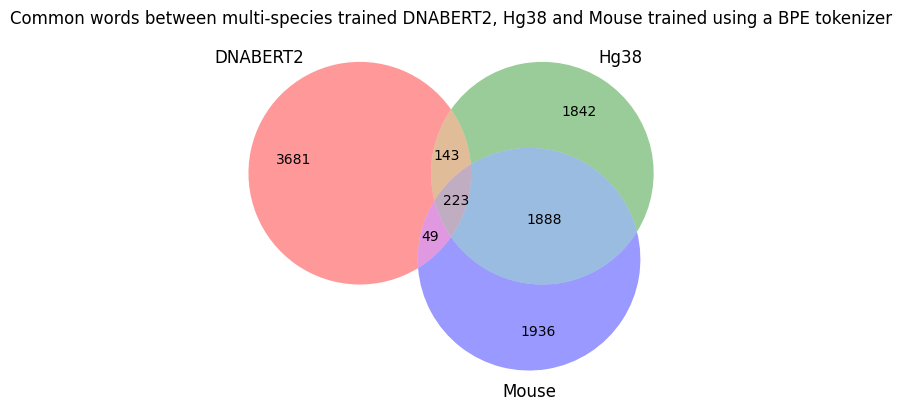

In [63]:
# Create a Venn diagram
venn3([dnabert2, hg38, mouse], ('DNABERT2', 'Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2, Hg38 and Mouse trained using a BPE tokenizer")
plt.show()

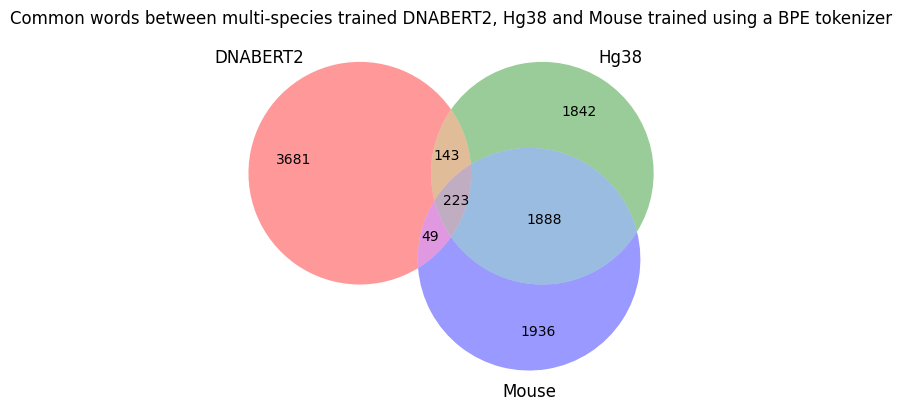

In [64]:
venn3([dnabert2, hg38, mouse], ('DNABERT2', 'Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2, Hg38 and Mouse trained using a BPE tokenizer")
plt.show()

In [95]:
df_dnabert2 = pd.DataFrame(dnabert2, columns=['words'])
df_dnabert2['length'] = df_dnabert2['words']
df_dnabert2.to_csv('dnabert2_wordfreq.csv')

In [96]:
df_mouse = pd.DataFrame(mouse, columns=['words'])
df_mouse['length'] = df_mouse['words']
df_mouse.to_csv('mouse_wordfreq.csv')

In [97]:
df_hg38 = pd.DataFrame(hg38, columns=['words'])
df_hg38['length'] = df_hg38['words']
df_hg38.to_csv('hg38_wordfreq.csv')

In [98]:
df_yeast = pd.DataFrame(yeast, columns=['words'])
df_yeast['length'] = df_yeast['words']
df_yeast.to_csv('yeast_wordfreq.csv')

In [99]:
df_bacteria = pd.DataFrame(bacteria, columns=['words'])
df_bacteria['length'] = df_bacteria['words']
df_bacteria.to_csv('bacteria_wordfreq.csv')

# DNABERT2 Training Species Data

In [65]:
headers = ['Class', 'Species', 'Total Nucleotides']
dnabert2_species = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/DNABERT_species.txt',names=headers )


In [66]:
dnabert2_species

,Class,Species,Total Nucleotides
0,Fungi,Ceratobasidium,655.37
1,Fungi,Claviceps Maximensis,329.79
2,Fungi,Fusarium Annulatum,449.98
3,Fungi,Melampsora,699.52
4,Fungi,Metschnikowia,109.36
...,...,...,...
130,Bacteria,Verrucomicrobiales Bacterium,3.15
131,Bacteria,Vibrio,41.47
132,Bacteria,Victivallis Lenta,55.45
133,Bacteria,Virgibacillus Salexigens,44.18


In [67]:
dnabert2_species['Percentage'] = (dnabert2_species['Total Nucleotides'] / dnabert2_species['Total Nucleotides'].sum()) * 100
dnabert2_species

,Class,Species,Total Nucleotides,Percentage
0,Fungi,Ceratobasidium,655.37,0.201735
1,Fungi,Claviceps Maximensis,329.79,0.101516
2,Fungi,Fusarium Annulatum,449.98,0.138512
3,Fungi,Melampsora,699.52,0.215325
4,Fungi,Metschnikowia,109.36,0.033663
...,...,...,...,...
130,Bacteria,Verrucomicrobiales Bacterium,3.15,0.000970
131,Bacteria,Vibrio,41.47,0.012765
132,Bacteria,Victivallis Lenta,55.45,0.017069
133,Bacteria,Virgibacillus Salexigens,44.18,0.013599


In [68]:
summary = dnabert2_species.groupby('Class')['Total Nucleotides'].sum().reset_index()

In [69]:
summary

,Class,Total Nucleotides
0,Bacteria,3597.73
1,Fungi,3772.98
2,Invertebrate,49964.57
3,Mammalian,186931.55
4,Other Vertebrate,79355.99
5,Protozoa,1243.64


In [70]:
summary['Percentage'] = (summary['Total Nucleotides'] / summary['Total Nucleotides'].sum()) * 100
summary

,Class,Total Nucleotides,Percentage
0,Bacteria,3597.73,1.107449
1,Fungi,3772.98,1.161394
2,Invertebrate,49964.57,15.380033
3,Mammalian,186931.55,57.541043
4,Other Vertebrate,79355.99,24.427265
5,Protozoa,1243.64,0.382816


In [71]:
mask = ~dnabert2_species['Class'].str.contains('Mammalian')

# Separate into 'Mammalian' and other families
mammalian_df = dnabert2_species[~mask]
mammalian_df['Class'] = mammalian_df['Species']

other_df = dnabert2_species[mask]

# Summarize other families
summary_mammalian = other_df.groupby('Class')['Total Nucleotides'].sum().reset_index()

# Append 'Mammalian' families back to the summary
summary_mammalian = pd.concat([summary_mammalian, mammalian_df], ignore_index=True)
summary_mammalian.drop(columns=['Species'], inplace=True)
summary_mammalian.drop(columns=['Percentage'], inplace=True)

summary_mammalian['Percentage'] = (summary_mammalian['Total Nucleotides'] / summary_mammalian['Total Nucleotides'].sum()) * 100
sorted_summary = summary_mammalian.sort_values(by='Percentage', ascending=False)
print(sorted_summary)

                      Class  Total Nucleotides  Percentage
3          Other Vertebrate           79355.99   24.427265
2              Invertebrate           49964.57   15.380033
7                     Human           31372.10    9.656922
5           Bubalus Bubalis           28768.00    8.855331
9              Macaca Nigra           28217.13    8.685763
8         Macaca Assamensis           27593.76    8.493878
10             Mus Musculus           26545.98    8.171351
11  Peromyscus Californicus           24677.56    7.596217
6       Camelus Dromedarius           19757.02    6.081582
1                     Fungi            3772.98    1.161394
0                  Bacteria            3597.73    1.107449
4                  Protozoa            1243.64    0.382816


<ipython-input-71-498970d63e00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mammalian_df['Class'] = mammalian_df['Species']


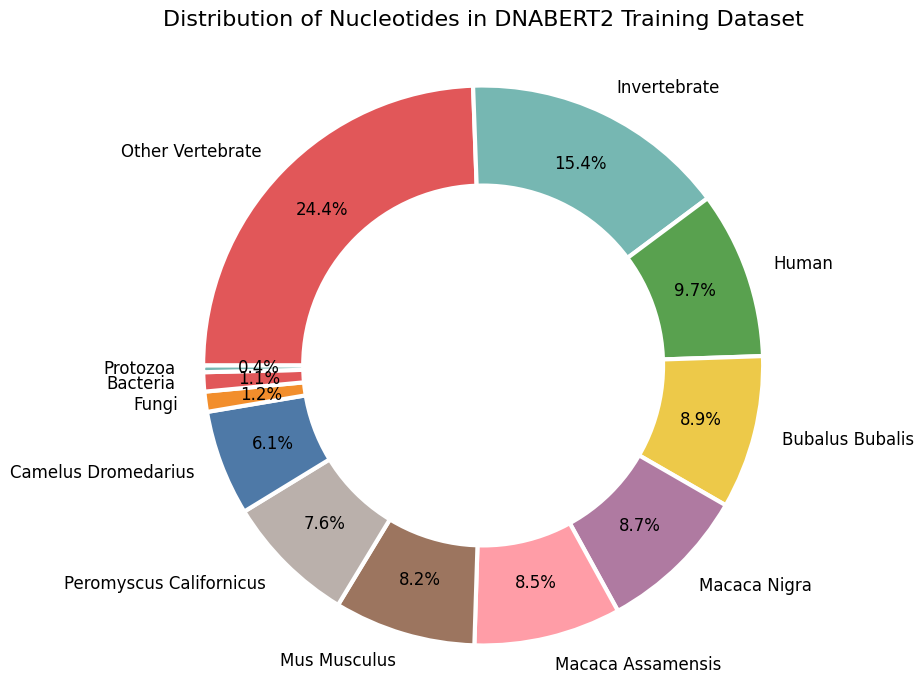

In [72]:
plt.figure(figsize=(10, 8))

plt.pie(sorted_summary['Total Nucleotides'],
        labels=sorted_summary['Class'],
        autopct='%1.1f%%',
        pctdistance=0.80,
        textprops={'fontsize':12},
        colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"],
        startangle=180,
        counterclock=False,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        )


hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.title('Distribution of Nucleotides in DNABERT2 Training Dataset\n', fontsize=16)
plt.gcf().gca().add_artist(hole)
#plt.legend(sorted_summary['Class'], loc='center left', bbox_to_anchor=(0.87, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('dnabert2_pie.eps', bbox_inches='tight')

# Show the plot
plt.show()

# BPE vs Char visualization

In [73]:
bpevschar = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bpevschar_all.csv')
bpevschar

,Model,Benchmark,Task,Category,Layers,char-acc,bpe-acc,char-mcc,bpe-mcc
0,Mamba,Nucleotide Transformer Tasks,H3,emp,4,0.885,0.870,0.774,0.780
1,Mamba,Nucleotide Transformer Tasks,H3K14ac,emp,4,0.684,0.770,0.399,0.596
2,Mamba,Nucleotide Transformer Tasks,H3K36me3,emp,4,0.723,0.769,0.489,0.573
3,Mamba,Nucleotide Transformer Tasks,H3K4me1,emp,4,0.696,0.733,0.405,0.483
4,Mamba,Nucleotide Transformer Tasks,H3K4me2,emp,4,0.613,0.726,0.198,0.463
...,...,...,...,...,...,...,...,...,...
56,Mamba,Genomic Benchmark,human_enhancers_ensembl,enhancers,4,0.864,0.864,0.736,0.730
57,Mamba,Genomic Benchmark,human_nontata_promoters,promoters,4,0.920,0.914,0.864,0.864
58,Mamba,Genomic Benchmark,human_ensembl_regulatory,regulatory,4,0.866,0.895,0.866,0.895
59,Mamba,Genomic Benchmark,human_ocr_ensembl,regulatory,4,0.805,0.757,0.920,0.914


In [74]:
bpevschar['bpe-mcc'] = pd.to_numeric(bpevschar['bpe-mcc'], errors='coerce')
bpevschar['bpe-mcc'].fillna(0, inplace=True)
bpevschar

,Model,Benchmark,Task,Category,Layers,char-acc,bpe-acc,char-mcc,bpe-mcc
0,Mamba,Nucleotide Transformer Tasks,H3,emp,4,0.885,0.870,0.774,0.780
1,Mamba,Nucleotide Transformer Tasks,H3K14ac,emp,4,0.684,0.770,0.399,0.596
2,Mamba,Nucleotide Transformer Tasks,H3K36me3,emp,4,0.723,0.769,0.489,0.573
3,Mamba,Nucleotide Transformer Tasks,H3K4me1,emp,4,0.696,0.733,0.405,0.483
4,Mamba,Nucleotide Transformer Tasks,H3K4me2,emp,4,0.613,0.726,0.198,0.463
...,...,...,...,...,...,...,...,...,...
56,Mamba,Genomic Benchmark,human_enhancers_ensembl,enhancers,4,0.864,0.864,0.736,0.730
57,Mamba,Genomic Benchmark,human_nontata_promoters,promoters,4,0.920,0.914,0.864,0.864
58,Mamba,Genomic Benchmark,human_ensembl_regulatory,regulatory,4,0.866,0.895,0.866,0.895
59,Mamba,Genomic Benchmark,human_ocr_ensembl,regulatory,4,0.805,0.757,0.920,0.914


In [75]:
bpevschar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      61 non-null     object 
 1   Benchmark  61 non-null     object 
 2   Task       61 non-null     object 
 3   Category   61 non-null     object 
 4   Layers     61 non-null     int64  
 5   char-acc   61 non-null     float64
 6   bpe-acc    61 non-null     float64
 7   char-mcc   61 non-null     float64
 8   bpe-mcc    61 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.4+ KB


In [76]:
bpevschar.columns.tolist()

['Model',
 'Benchmark',
 'Task',
 'Category',
 'Layers',
 'char-acc',
 'bpe-acc',
 'char-mcc',
 'bpe-mcc']

In [77]:
bpevschar_gue = bpevschar[bpevschar['Benchmark'] == 'GUE']
bpevschar_gb = bpevschar[bpevschar['Benchmark'] == 'Genomic Benchmark']
bpevschar_nt = bpevschar[bpevschar['Benchmark'] == 'Nucleotide Transformer Tasks']

In [78]:
from matplotlib.lines import Line2D

In [79]:
def plot_bpe_vs_char(ax, df, df_subset, bpe, char, xlabel, ylabel, title, range_min, range_max):
  print(range_min, range_max)
  hex_colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"]
  markers = [ 'o', 's', 'd', 'P','v', '<', '>', 'p', 'P', '*', 'o', 's', 'D', '^',]

  unique_layers = df['Layers'].unique()
  print(unique_layers)
  unique_category = df['Category'].unique()
  print(unique_category)
  marker_map = {category: markers[i % len(markers)] for i, category in enumerate(unique_category)} # different color for each
  color_map = {category: hex_colors[i % len(hex_colors)] for i, category in enumerate(unique_category)}

  #for layer_size in unique_layers:
  for category in unique_category:
    subset = df_subset[(df_subset['Layers'] == 4) & (df_subset['Category'] == category)]
    #subset = df_subset[(df_subset['Category'] == category)]
    ax.scatter(subset[bpe], subset[char], c=color_map[category], marker=marker_map[category], label=None, s=36)


  ax.set_xlim([range_min, range_max])
  ax.set_ylim([range_min, range_max])

  ax.set_xlabel(xlabel, fontsize=12)
  ax.set_ylabel(ylabel, fontsize=12)
  ax.set_title(title, fontsize=14)

  # Add a diagonal line
  ax.plot([range_min, range_max], [range_min, range_max], color='#d3d3d3', linestyle='--')

  ax.grid(True, which="both", ls="--")

  #for layer in unique_layers:
  #  ax.scatter([], [], marker=marker_map[layer], color='grey', label=f'{layer} Layers')  # Empty scatter plot to create color legend

  unique_sub_category = df_subset['Category'].unique()
  for category in unique_sub_category:
    ax.scatter([], [], color=color_map[category], marker=marker_map[category], label=f'{category}')  # Empty scatter plot to create shape legend

  legend = ax.legend(loc='lower right', fontsize=10)
  legend.get_frame().set_linewidth(0)
  #plt.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
  return ax

0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0.5 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']
0 1
[4 8]
['emp' 'promoter' 'splice sites' 'enhancers' 'promoters'
 'transcription factors' 'coding' 'regulatory' 'species']


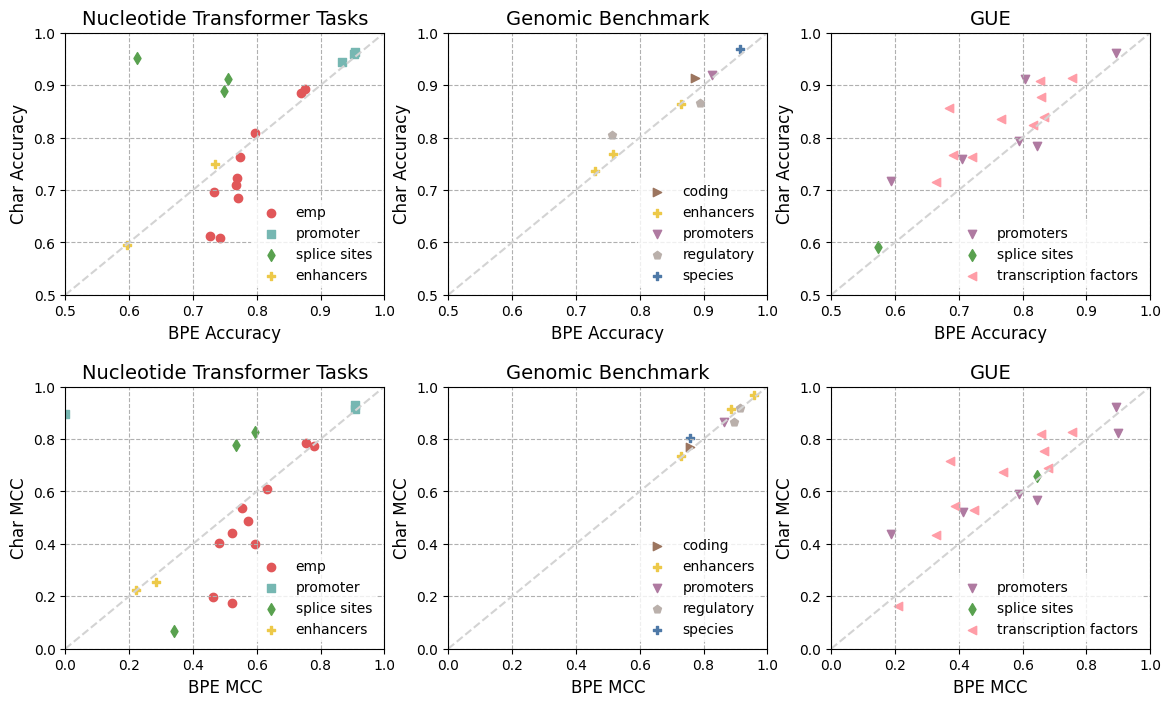

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
from matplotlib.ticker import StrMethodFormatter



scatter1 = plot_bpe_vs_char(axes[0,0], bpevschar, bpevschar_nt, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Nucleotide Transformer Tasks', 0.5, 1)
scatter2 = plot_bpe_vs_char(axes[1,0], bpevschar, bpevschar_nt, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Nucleotide Transformer Tasks', 0, 1)
scatter3 = plot_bpe_vs_char(axes[0,1], bpevschar, bpevschar_gb, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Genomic Benchmark', 0.5, 1)
scatter4 = plot_bpe_vs_char(axes[1,1], bpevschar, bpevschar_gb, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Genomic Benchmark', 0, 1)
scatter5 = plot_bpe_vs_char(axes[0,2], bpevschar, bpevschar_gue, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'GUE', 0.5, 1)
scatter6 = plot_bpe_vs_char(axes[1,2], bpevschar, bpevschar_gue, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'GUE', 0, 1)

fig.subplots_adjust(hspace=0.35)
fig.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
#fig.suptitle("Tokenization Comparison on Mamba using the NT Tasks\n", fontsize=16)

# Variance

In [81]:
attention_models = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/anisa_results_tall.csv')

In [82]:
attention_models.head()


,model,task,task_category,task_benchmark,replicate_number,accuracy,f1,mcc,sequence_length,epoch
0,DNABERT-1 (6-mer),enhancers,Regulatory (human),Nucleotide Transformer,1,0.852310,0.852189,0.704499,200.0,4.0
1,DNABERT-1 (6-mer),enhancers_types,Regulatory (human),Nucleotide Transformer,1,0.767729,0.738276,0.630650,200.0,4.0
2,DNABERT-1 (6-mer),splice_sites_all,Splice Sites (human),Nucleotide Transformer,1,0.980667,0.980643,0.971021,600.0,5.0
3,DNABERT-1 (6-mer),splice_sites_acceptors,Splice Sites (human),Nucleotide Transformer,1,0.970694,0.970694,0.941455,400.0,5.0
4,DNABERT-1 (6-mer),splice_sites_donor,Splice Sites (human),Nucleotide Transformer,1,0.977242,0.977241,0.954496,400.0,5.0


In [83]:
models = attention_models['model'].unique()
models

array(['DNABERT-1 (6-mer)', 'DNABERT-2', 'NT 500M 1000G', 'HyenaDNA (1k)',
       'GPT2'], dtype=object)

In [84]:
metrics_list = []

for model in models:
  attention_model = attention_models[attention_models['model'] == model]
  tasks = attention_model['task'].unique()
  for task in tasks:
    attention_task = attention_model[attention_model['task'] == task]
    metrics_dict = {
      'Model': model,
      'Task': task,
      'Accuracy Mean': attention_task['accuracy'].mean(),
      'Accuracy Min': attention_task['accuracy'].min(),
      'Accuracy Max': attention_task['accuracy'].max(),
      'Accuracy Std': attention_task['accuracy'].std(),
      'MCC Mean': attention_task['mcc'].mean(),
      'MCC Min': attention_task['mcc'].min(),
      'MCC Max': attention_task['mcc'].max(),
      'MCC Std': attention_task['mcc'].std()
    }

    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df

,Model,Task,Accuracy Mean,Accuracy Min,Accuracy Max,Accuracy Std,MCC Mean,MCC Min,MCC Max,MCC Std
0,DNABERT-1 (6-mer),enhancers,0.855628,0.848406,0.862720,0.004063,0.711278,0.696818,0.725447,0.008110
1,DNABERT-1 (6-mer),enhancers_types,0.767729,0.754717,0.777489,0.007649,0.628811,0.609519,0.646009,0.012649
2,DNABERT-1 (6-mer),splice_sites_all,0.978967,0.976000,0.981667,0.001902,0.968475,0.964053,0.972507,0.002839
3,DNABERT-1 (6-mer),splice_sites_acceptors,0.971506,0.967538,0.974301,0.002036,0.943086,0.935267,0.948650,0.004036
4,DNABERT-1 (6-mer),splice_sites_donor,0.974875,0.972690,0.977242,0.001559,0.949786,0.945539,0.954496,0.003088
...,...,...,...,...,...,...,...,...,...,...
191,GPT2,human_enhancers_ensembl,0.749173,0.744510,0.753035,0.002575,0.498583,0.489143,0.506529,0.005150
192,GPT2,human_ensembl_regulatory,0.745278,0.744205,0.746869,0.000983,0.372271,0.369993,0.376129,0.002031
193,GPT2,human_nontata_promoters,0.706311,0.699419,0.710490,0.003902,0.425762,0.403812,0.441510,0.011529
194,GPT2,human_ocr_ensembl,0.587543,0.584058,0.590352,0.001978,0.175068,0.167906,0.180535,0.004050


In [85]:
for model in models:
  attention_model = attention_models[attention_models['model'] == model]
  model_metrics = metrics_df[metrics_df['Model'] == model]
  print("*****************************")
  print(model)
  print(model_metrics.describe())

*****************************
DNABERT-1 (6-mer)
       Accuracy Mean  Accuracy Min  Accuracy Max  Accuracy Std   MCC Mean  \
count      40.000000     40.000000     40.000000     40.000000  40.000000   
mean        0.808566      0.796629      0.820272      0.007771   0.617720   
std         0.099838      0.105578      0.096981      0.009711   0.204283   
min         0.621488      0.545455      0.633326      0.001000   0.243011   
25%         0.738953      0.709628      0.748573      0.003214   0.450386   
50%         0.819050      0.803334      0.837910      0.005232   0.644260   
75%         0.868825      0.862767      0.889478      0.007169   0.738717   
max         0.978967      0.976000      0.981667      0.050957   0.968475   

         MCC Min    MCC Max    MCC Std  
count  40.000000  40.000000  40.000000  
mean    0.593921   0.641413   0.015471  
std     0.216045   0.197954   0.019724  
min     0.081954   0.267672   0.002504  
25%     0.417337   0.469239   0.006062  
50%     0.61

In [86]:
metrics_df.to_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/attention_metrics.csv', index=False)

In [87]:
ss_models = pd.read_csv('test_metrics.txt') # state space model data

FileNotFoundError: [Errno 2] No such file or directory: 'test_metrics.txt'

In [ ]:
ss_models

In [ ]:
models = ss_models['model'].unique()
models

In [ ]:
metrics_list=[]

In [ ]:
#ERROR IN THIS CHECK IT
for model in models:
  ss_models = ss_models[ss_models['model'] == model]
  tasks = ss_models['task'].unique()
  for task in tasks:
    ss_task = ss_model[ss_model['task'] == task]
    metrics_dict = {
      'Model': model,
      'Task': task,
      'Accuracy Mean': ss_task['value'].mean(),
      'Accuracy Min': ss_task['value'].min(),
      'Accuracy Max': ss_task['value'].max(),
      'Accuracy Std': ss_task['value'].std(),

    }
    metrics_list.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df